In [3]:
# Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combine_data = city_data.merge(ride_data,on='city',how='outer')

# Display the data table for preview
combine_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [10]:
#groupby the city name to set as index
city_group = combine_data.groupby('city')
# count rides by city for x
ride_count = city_group['ride_id'].count()
# ave fare by city for y
ave_fare = city_group['fare'].mean()
# count drivers 
driver_count = city_group['driver_count'].mean()
# add type as well to create three scatter plots by type
city_type = city_data.set_index('city')['type']

# create dictionary dataframe
summary = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": ave_fare,
    "Number of Drivers": driver_count,
    "City Type": city_type
})


summary.head()

,Number of Rides,Average Fare,Number of Drivers,City Type
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural


In [4]:
#separate three dfs to create three categorized scatter plots
urban = summary[summary['City Type'] == 'Urban']
suburban = summary[summary['City Type'] == 'Suburban']
rural = summary[summary['City Type'] == 'Rural']
rural.head()

,Number of Rides,Average Fare,Number of Drivers,City Type
Bradshawfurt,10,40.064000,7.0,Rural
Garzaport,3,24.123333,7.0,Rural
Harringtonfort,6,33.470000,4.0,Rural
Jessicaport,6,36.013333,1.0,Rural
Lake Jamie,6,34.358333,4.0,Rural


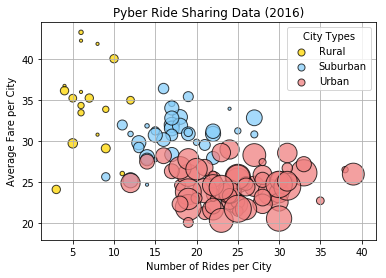

In [11]:
# three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = '#FFD700', edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = '#87CEFA', edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = '#F08080', edgecolor = 'black', label = 'Urban', alpha = .75)
#print scatter plot
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')
lgnd = plt.legend()
lgnd.set_title('City Types')
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

plt.grid(True)

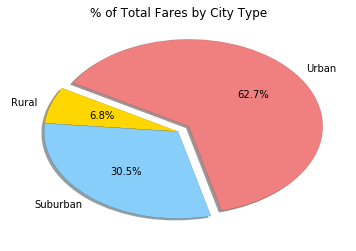

In [6]:
#group by type to be used by all pie charts
by_type = combine_data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

# sum fare by city
fare_sum = by_type.sum()['fare']
fare_sum
# plot pie chart
plt.pie(fare_sum, startangle = 150, colors = ["#FFD700","#87CEFA","#F08080"], explode = (0,0,0.1), labels = fare_sum.index, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .1, 'edgecolor': 'black'})

# memo = plt.axis('equal') = change the shape 
plt.title('% of Total Fares by City Type')
plt.show()

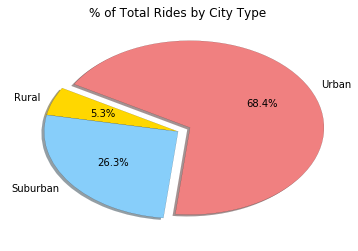

In [7]:
# number of rides by city type
ride_sum = by_type.count()['ride_id']

plt.pie(ride_sum, startangle = 150, explode = (0,0,0.1), colors = ["#FFD700","#87CEFA","#F08080"], labels = ride_sum.index, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .1, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.show()

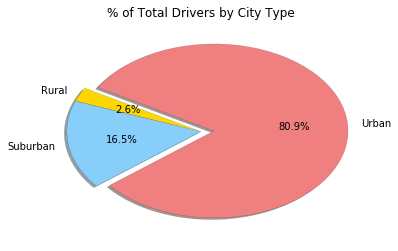

In [8]:
# Number of driver by city type
driver_sum = city_data.groupby('type').sum()['driver_count']

plt.pie(driver_sum, startangle = 150, explode = (0,0,0.1), colors = ["#FFD700","#87CEFA","#F08080"], labels = ride_sum.index, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .1, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.show()